## Quantum Computing and Quantum Machine Learning, Project 1

### Part a) Setting up Circuits and States

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.rcParams.update({
    'font.size': 12,
    "figure.figsize":(8,6),
    "axes.grid": True,
    "grid.color": "#cccccc",
    "grid.linestyle": "--",
    "axes.prop_cycle": plt.cycler(color=['#0f7e92', '#b90636', '#11793e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
})


#Write a function which sets up a one-qubit basis
def one_qubit_basis() -> np.array: 
    q0 = np.array([1,0])
    q1 = np.array([0,1])
    return q0, q1
#defining a function that returns the Bell states
def bell_state() -> np.array:
    q0, q1 = one_qubit_basis()
    s00 = np.kron(q0,q0)
    s01 = np.kron(q0,q1)
    s10 = np.kron(q1,q0)
    s11 = np.kron(q1,q1)

    q00 = (s00 + s11)/np.sqrt(2)
    q01 = (s01 + s10)/np.sqrt(2)
    q10 = (s00 - s11)/np.sqrt(2)
    q11 = (s01 - s10)/np.sqrt(2)

    return q00, q01, q10, q11


def σ_x() -> np.array:
    """
    Returns the Pauli-X matrix.
    """
    return np.array([[0,1],[1,0]])

def σ_y() -> np.array:
    """
    Returns the Pauli-Y matrix.
    """
    return np.array([[0,-1j],[1j,0]])

def σ_z() -> np.array:
    """
    Returns the Pauli-Z matrix.
    """
    return np.array([[1,0],[0,-1]])


def Hadamard() -> np.array:
    """
    Returns the Hadamard gate.
    """
    return 1/np.sqrt(2)*np.array([[1,1],[1,-1]])

def Phase() -> np.array:
    """
    Returns the Phase gate.
    """
    return np.array([[1,0],[0,1j]])

def cnot() -> np.array:
    """
    Returns the CNOT gate.
    """
    return np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

def swap() -> np.array:
    """ 
    Returns the SWAP gate
    """
    return np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])


q0, q1 = one_qubit_basis()
print("|0⟩:",q0)
print("|1⟩:",q1)

#Pauli matrices
sigma_x = σ_x()
sigma_y = σ_y()
sigma_z = σ_z()

# Applying Pauli matrices to the basis
q0_sigma_x = sigma_x@q0
q1_sigma_x = sigma_x@q1
print("\nσ_x|0⟩:",q0_sigma_x)
print("σ_x|1⟩:",q1_sigma_x)

q0_sigma_y = sigma_y@q0
q1_sigma_y = sigma_y@q1
print("σ_y|0⟩:",q0_sigma_y)
print("σ_y|1⟩:",q1_sigma_y)

q0_sigma_z = sigma_z@q0
q1_sigma_z = sigma_z@q1
print("σ_z|0⟩:",q0_sigma_z)
print("σ_z|1⟩:",q1_sigma_z)

# Create Hadamar and Phase gates
H = Hadamard()
S = Phase()

#Apply Hadamard and Phase gates to the basis
q0_H = H@q0
q1_H = H@q1
print("\nH|0⟩:",q0_H)
print("H|1⟩:",q1_H)

q0_S = S@q0
q1_S = S@q1
print("\nP|0⟩:",q0_S)
print("P|1⟩:",q1_S)


#Define CNOT gate
CNOT = cnot()


#Create Bell state out of q0 with Hadamard and CNOT
q0_H = H@q0
q1_H = H@q1
bell00 = CNOT@np.kron(q0_H,q0)
bell10 = CNOT@np.kron(q1_H,q0) 
bell01 = CNOT@np.kron(q0_H,q1)
bell11 = CNOT@np.kron(q1_H,q1)

bs00,bs01,bs10,bs11 = bell_state()  

print("\nBell states:") 
print("Bell state |00⟩:",bell00)
print("Bell state |01⟩:",bell01)
print("Bell state |10⟩:",bell10)
print("Bell state |11⟩:",bell11)
print("\nDouble check Bell states:")
print("Bell state |00⟩:",bs00)
print("Bell state |01⟩:",bs01)
print("Bell state |10⟩:",bs10)
print("Bell state |11⟩:",bs11)


|0⟩: [1 0]
|1⟩: [0 1]

σ_x|0⟩: [0 1]
σ_x|1⟩: [1 0]
σ_y|0⟩: [0.+0.j 0.+1.j]
σ_y|1⟩: [0.-1.j 0.+0.j]
σ_z|0⟩: [1 0]
σ_z|1⟩: [ 0 -1]

H|0⟩: [0.70710678 0.70710678]
H|1⟩: [ 0.70710678 -0.70710678]

P|0⟩: [1.+0.j 0.+0.j]
P|1⟩: [0.+0.j 0.+1.j]

Bell states:
Bell state |00⟩: [0.70710678 0.         0.         0.70710678]
Bell state |01⟩: [0.         0.70710678 0.70710678 0.        ]
Bell state |10⟩: [ 0.70710678  0.          0.         -0.70710678]
Bell state |11⟩: [ 0.          0.70710678 -0.70710678  0.        ]

Double check Bell states:
Bell state |00⟩: [0.70710678 0.         0.         0.70710678]
Bell state |01⟩: [0.         0.70710678 0.70710678 0.        ]
Bell state |10⟩: [ 0.70710678  0.          0.         -0.70710678]
Bell state |11⟩: [ 0.          0.70710678 -0.70710678  0.        ]


In [220]:
#Apply Hadamard, then CNOT to the Bell states
bell00_H = np.kron(H,np.eye(2))@bell00
bell01_H = np.kron(H,np.eye(2))@bell01
bell10_H = np.kron(H,np.eye(2))@bell10
bell11_H = np.kron(H,np.eye(2))@bell11

print("\nBell states after Hadamard gate:")
print("Bell state |00⟩:",bell00_H)
print("Bell state |01⟩:",bell01_H)
print("Bell state |10⟩:",bell10_H)
print("Bell state |11⟩:",bell11_H)

bell00_HCNOT = CNOT@bell00_H
bell01_HCNOT = CNOT@bell01_H
bell10_HCNOT = CNOT@bell10_H
bell11_HCNOT = CNOT@bell11_H

print("\nBell states after Hadamard and CNOT gates:")
print("Bell state |00⟩:",bell00_HCNOT)
print("Bell state |01⟩:",bell01_HCNOT)
print("Bell state |10⟩:",bell10_HCNOT)
print("Bell state |11⟩:",bell11_HCNOT)



Bell states after Hadamard gate:
Bell state |00⟩: [ 0.5  0.5  0.5 -0.5]
Bell state |01⟩: [ 0.5  0.5 -0.5  0.5]
Bell state |10⟩: [ 0.5 -0.5  0.5  0.5]
Bell state |11⟩: [-0.5  0.5  0.5  0.5]

Bell states after Hadamard and CNOT gates:
Bell state |00⟩: [ 0.5  0.5 -0.5  0.5]
Bell state |01⟩: [ 0.5  0.5  0.5 -0.5]
Bell state |10⟩: [ 0.5 -0.5  0.5  0.5]
Bell state |11⟩: [-0.5  0.5  0.5  0.5]


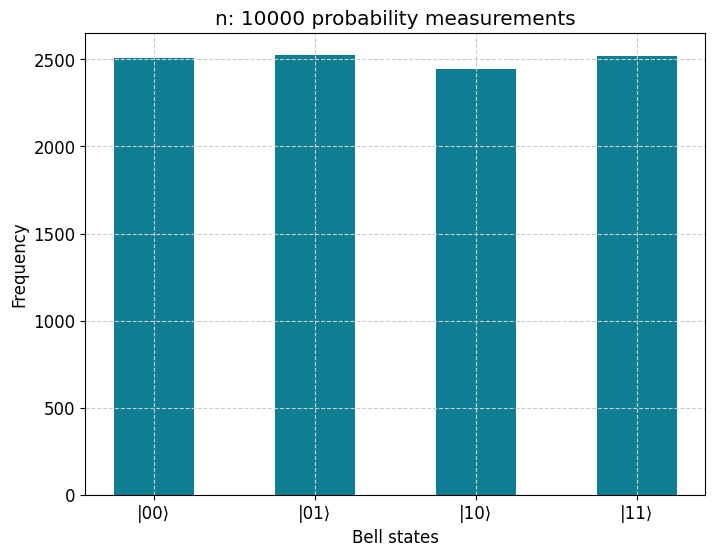

In [221]:
#Make repeated measurements on the first qubit, then the second qubit

def bell_measurements(n, bell_state):#11793e
    """
    Measurements on Bell state "|ψ⟩ = α|00⟩ + β|01⟩ + γ|10⟩ + δ|11⟩":
    |00⟩ - α : idx0
    |01⟩ - β : idx1
    |10⟩ - γ : idx2
    |11⟩ - δ : idx3
    """
    α, β, γ, δ = np.abs(bell_state)**2
    q0_probs = [α + β, γ + δ] #probabilities for being in |0⟩ or |1⟩
    
    results = np.zeros(n)
    for i in range(n):

        q0_measure = np.random.choice(2, p=q0_probs) #returns either 0 or 1
        if q0_measure == 0:
            #if q0-> |0⟩, then complete measurement is either |00⟩ or |01⟩
            q1_prob = [α/(α+β), β/(α+β)] #probabilities for |plt.rcparams.update({'figure.figsize': [12,6]})00⟩ or |01⟩, normalized
            q1_measure = np.random.choice(2, p=q1_prob)
            results[i] = q1_measure
        else:
            #if q0-> |1⟩, then complete measurement is either |10⟩ or |11⟩
            q1_prob = [γ/(γ+δ), δ/(γ+δ)] #probabilities for |10⟩ or |11⟩, normalized
            q1_measure = np.random.choice(2, p=q1_prob)
            results[i] = q1_measure + 2 #shifts the index to 2 or 3


    return results


n = 10000
results = bell_measurements(n, bell00_HCNOT)

plt.hist(results, bins = np.arange(5)-0.5,rwidth=0.5)
plt.xticks(range(4), ["|00⟩", "|01⟩", "|10⟩", "|11⟩"])
plt.title(f"n: {n} probability measurements")
plt.ylabel("Frequency")
plt.xlabel("Bell states")
plt.show()



Qiskit measurements: {'01': 2530, '11': 2514, '10': 2511, '00': 2445}


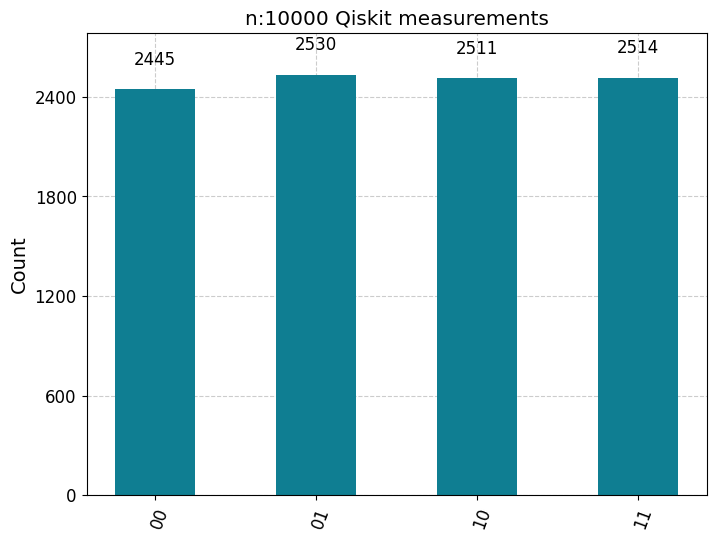

In [222]:
#Compare results with Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Create a quantum circuit
qc = QuantumCircuit(2,2)
#Apply Hadamard gate to q0, and q1
qc.h(0)
qc.h(1)

#Apply CNOT gate
qc.cx(0,1) 

#Measure qubits
qc.measure(0,0)# measure q0, and store the result in the first classical bit
qc.measure(1,1)# measure q1, and store the result in the second classical bit

#Simulate the quantum circuit
n = 10000
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc,shots=n).result()
counts = result.get_counts()
print("Qiskit measurements:",counts)

plot_histogram(counts, title=f"n:{n} Qiskit measurements")

### Part b) Eigenvalue problem

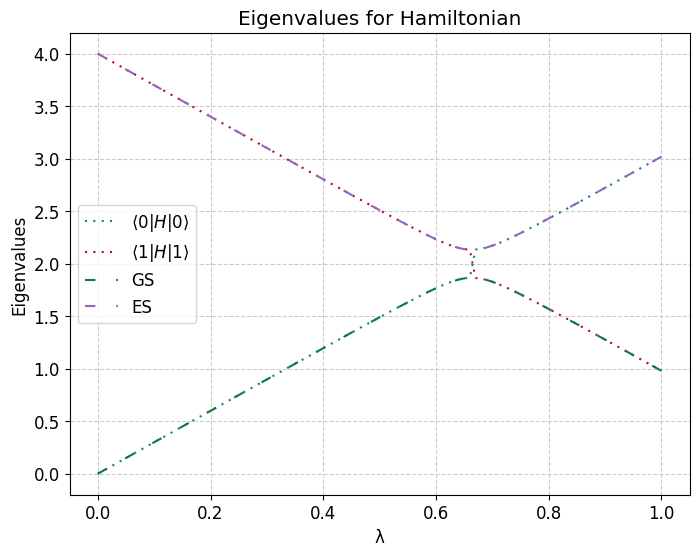

In [223]:
#Define values
E_1 = 0
E_2 = 4
V_11 = 3
V_22 = -V_11
V_12 = 0.2
V_21 = V_12

squigly_E = (E_1 + E_2)/2
Omega = (E_1 - E_2)/2

c = (V_11 + V_22)/2
omega_z = (V_11 - V_22)/2
omega_x = V_12

H_0 = squigly_E*np.eye(2) + Omega*σ_z()
H_1 = c*np.eye(2) + omega_z*σ_z() + omega_x*σ_x()


def Hamiltonian(lam: float) -> np.array:
    """
    0 <= lam <= 1\n
    returns the Hamiltonian for a given value of lambda
    """
    return H_0 + lam*H_1



def solve_eigenvalues(lam: float) -> np.array:
    """
    0 <= lam <= 1\n
    returns the eigenvalues for a given value of lambda
    """
    eigvals, eigvecs = np.linalg.eig(Hamiltonian(lam))
    return eigvals, eigvecs

lam = np.linspace(0,1,101)
eigenvalues = []
eigenvectors = []

for i in lam:
    eigvals, eigvecs = solve_eigenvalues(i)
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

gs,es = [],[]
for i in range(len(eigenvalues)):
    gs.append(min(eigenvalues[i]))
    es.append(max(eigenvalues[i]))


plt.plot(lam,eigenvalues,linestyle = (0,(1,3))) 
plt.plot(lam,gs,linestyle = (0,(5,10)))
plt.plot(lam,es,linestyle = (0,(5,10)))
plt.xlabel("λ")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian")
plt.legend([f"$⟨0|H|0⟩$",f"$⟨1|H|1⟩$","GS","ES"])
plt.show()






### Part c) VQE

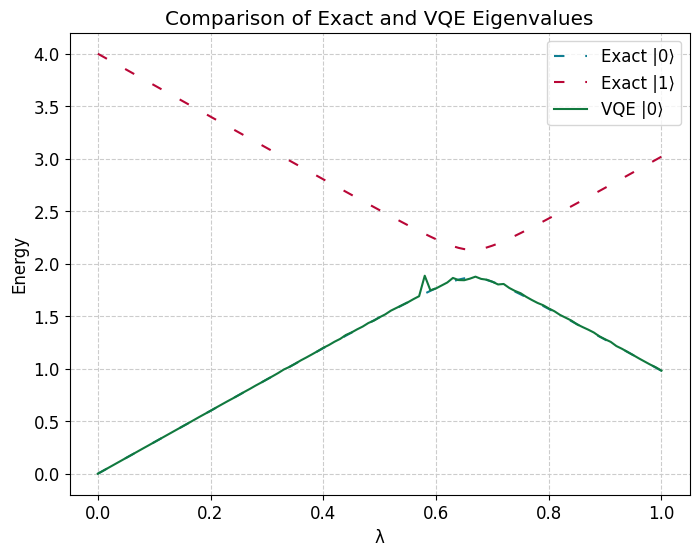

In [224]:

def R_x(theta: float) -> np.array:
    """
    Returns the rotation matrix around the x-axis
    """
    return np.cos(theta/2)*np.eye(2) - 1j*np.sin(theta/2)*σ_x()

def R_y(phi: float) -> np.array:
    """
    Returns the rotation matrix around the y-axis
    """
    return np.cos(phi/2)*np.eye(2) - 1j*np.sin(phi/2)*σ_y()

def ansatz_circuit(theta,phi):
    return R_x(theta)@R_y(phi)@q0


def unitary(lmbda: float):

    I = np.eye(2)
    Z_measure = I
    X_measure = H
    neglect = None

    pauli_measurements = {
        "H01":[neglect,squigly_E],
        "H02":[Z_measure,Omega],
        "HI1":[neglect,c],
        "HI2":[Z_measure,lmbda*omega_z],
        "HI3":[X_measure,lmbda*omega_x] 
    }
    return pauli_measurements


def quantum_measurement(state, operator, shots=1000):
    """ 
    Simulate a quantum measurement using the given operator.
    Args:
        state (np.array): The quantum state.
        operator (np.array): The measurement operator.
        shots (int): Number of measurement shots.
    Returns:
        expectation_value (float): The expectation value.
    """
    state_prime = operator @ state
    prob_zero = np.abs(state_prime[0]) ** 2

    measurements = np.random.choice([0, 1], p=[prob_zero, 1 - prob_zero], size=shots)
    # Compute the expectation value
    n_ones = np.sum(measurements)
    n_zeros = shots - n_ones
    return (n_zeros - n_ones) / shots

def get_energy(theta, phi, lam, shots=1000):
    """
    Compute the energy of the Hamiltonian for a given lambda.
    Args:
        theta (float): Parameter for the ansatz circuit.
        phi (float): Parameter for the ansatz circuit.
        lam (float): Lambda parameter for the Hamiltonian.
        shots (int): Number of measurement shots.
    Returns:
        energy (float): The computed energy.
    """
    state = ansatz_circuit(theta, phi)
    pauli_measurements = unitary(lam)
    energy = 0
    for key, (operator, coefficient) in pauli_measurements.items():
        if isinstance(operator,np.ndarray):
            expectation_value = quantum_measurement(state, operator, shots=shots)
            energy += coefficient * expectation_value
        else:
            energy += coefficient
            
    return energy



# Define the cost function
def cost_function(params, lam, shots=100000):
    theta, phi = params
    return get_energy(theta, phi, lam, shots=shots)

# Initial guess for parameters
initial_params = np.random.rand(2)*np.pi

# Optimize for a specific lambda

lambdas = np.linspace(0,1,101)
vqe = np.zeros(len(lambdas))
eigvals = np.zeros((len(lambdas),2))
for i,l in enumerate(lambdas):
    res = minimize(cost_function, initial_params, args=(l,), method='COBYLA')
    vqe[i] = res.fun




plt.plot(lam, gs, label="Exact |0⟩",linestyle = (0,(5,10)))
plt.plot(lam, es, label="Exact |1⟩",linestyle = (0,(5,10)))
plt.plot(lam, vqe, label="VQE |0⟩")
plt.xlabel("λ")
plt.ylabel("Energy")
plt.title("Comparison of Exact and VQE Eigenvalues")
plt.legend()
plt.show()

### Part d) 2 bit basis

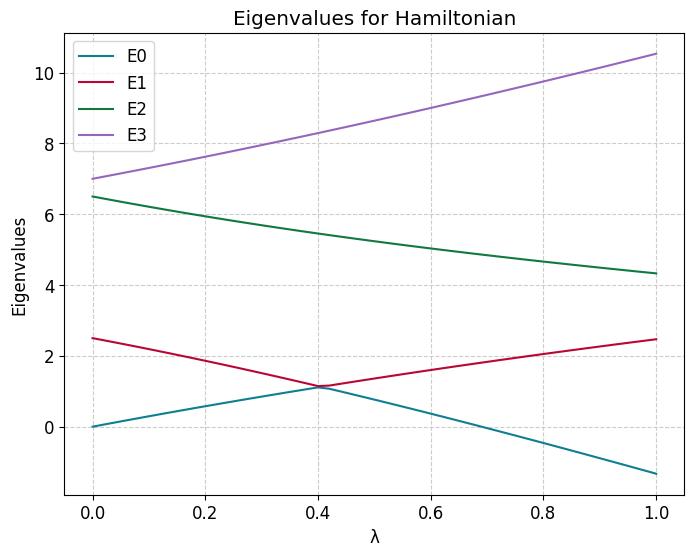

In [240]:
q00 = np.array([1,0,0,0])
q01 = np.array([0,1,0,0])
q10 = np.array([0,0,1,0])
q11 = np.array([0,0,0,1])

H0 = np.diag([0.0, 2.5, 6.5, 7.0])

#tensor product of pauli matrices
σ_xσ_x = np.kron(σ_x(),σ_x())
σ_zσ_z = np.kron(σ_z(),σ_z())
#Hamiltonian
Hx = 2.0
Hz = 3.0
Hi = Hx*σ_xσ_x + Hz*σ_zσ_z

def Hamiltonian(lam: float) -> np.array:
    """
    returns the Hamiltonian for a given value of lambda
    """
    return H0 + lam * Hi

#Compute eigenvalues
lam_vals = np.linspace(0,1,51)
eigenvalues = []
eigenvectors = []
for lam in lam_vals:
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian(lam))
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

plt.plot(lam_vals, eigenvalues)

plt.legend(["E0","E1","E2","E3"])
plt.xlabel("λ")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian")
plt.show()



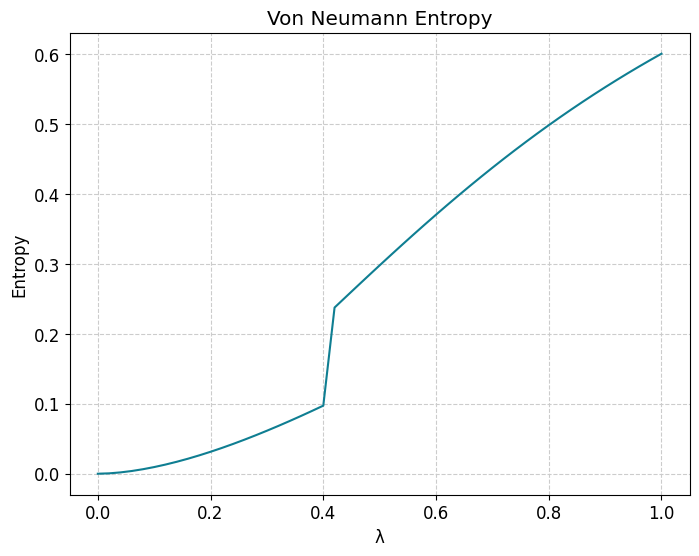

In [241]:
#Von Neumann entropy
def von_neumann_entropy(rho: np.array) -> float:
    """
    Returns the von Neumann entropy for a given density matrix
    """
    eigvals = np.linalg.eigvalsh(rho)
    eps = 1e-8 #Avoid log(0)
    return -np.sum(eigvals*np.log2(eigvals+eps))


def density_matrix(state: np.array) -> np.array:
    """
    Returns the density matrix for a given state
    """
    return np.outer(state, state.conj())

def partial_trace(state: np.array,index: int) -> np.array:
    """
    Returns the partial trace of a density matrix
    """
    density = density_matrix(state)
    q0, q1 = one_qubit_basis()
    I = np.eye(2)
    if index == 0:
        P0 = np.kron(q0, I)
        P1 = np.kron(q1, I)
    elif index == 1:
        P0 = np.kron(I, q0)
        P1 = np.kron(I, q1)
    else:
        raise ValueError("Index must be 0 or 1")

    return P0.conj() @ density @ P0.T + P1.conj() @ density @ P1.T

lam_vals = np.linspace(0,1,51)
eigenvalues = np.zeros((len(lam_vals),4))
eigenvectors = np.zeros((len(lam_vals),4,4),dtype=complex)

entropies = np.zeros(len(lam_vals))

for i,l in enumerate(lam_vals):
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian(l))
    eigenvalues[i] = eigvals
    eigenvectors[i] = eigvecs
    dens_a = partial_trace(eigvecs[:,0],0)
    dens_b = partial_trace(eigvecs[:,0],1)
    
    entropies[i] = von_neumann_entropy(dens_a) 

plt.plot(lam_vals, entropies)
plt.xlabel("λ")
plt.ylabel("Entropy")
plt.title("Von Neumann Entropy")
plt.show()



### Part e) More VQE

In [ ]:
def quantum_measurement(state, operator, shots=1000):
    """
    Simulates quantum measurement
    """
    # Compute the expectation value exactly
    # <ψ|O|ψ> where O is the operator and |ψ> is the state
    expectation = np.real(np.dot(np.conj(state), np.dot(operator, state)))
    return expectation

def ansatz_circuit(params):
    """
    Applies the ansatz circuit to the |00> state
    Args:
        params: Array of parameters [theta0, theta1, phi0, phi1]
    
    Returns:
        The quantum state after applying the ansatz circuit
    """
    theta0, theta1, phi0, phi1 = params
    
    # Start with |00> state
    state = q00.copy()
    rx_layer = np.kron(R_x(theta0), R_x(theta1))
    state = rx_layer @ state
    ry_layer = np.kron(R_y(phi0), R_y(phi1))
    state = ry_layer @ state
    state = CNOT @ state
    return state

def compute_energy_exact(params, lam):
    """
    Compute energy expectation value exactly for a given parameter set and lambda
    """
    state = ansatz_circuit(params)
    H = Hamiltonian(lam)
    energy = np.real(np.dot(np.conj(state), H @ state))
    return energy

def compute_energy_by_terms(params, lam, shots=1000):
    """
    Compute energy by measuring each term in the Hamiltonian separately
    """
    state = ansatz_circuit(params)
    
    # Decompose H0 into Pauli terms
    cII = (0.0 + 2.5 + 6.5 + 7.0) / 4
    cIZ = (0.0 - 2.5 + 6.5 - 7.0) / 4
    cZI = (0.0 + 2.5 - 6.5 - 7.0) / 4
    cZZ = (0.0 - 2.5 - 6.5 + 7.0) / 4
    
    σ_xσ_x = np.kron(σ_x(),σ_x())
    σ_zσ_z = np.kron(σ_z(),σ_z()) 
    Z = σ_z()
    # Identity operator
    I = np.eye(2)
    II = np.kron(I, I)
    IZ = np.kron(I, Z)
    ZI = np.kron(Z, I)
    
    # Compute expectation values for each term
    energy = cII  # Constant term
    energy += cIZ * quantum_measurement(state, IZ, shots)
    energy += cZI * quantum_measurement(state, ZI, shots)
    energy += cZZ * quantum_measurement(state, σ_zσ_z, shots)
    energy += lam * Hx * quantum_measurement(state, σ_xσ_x, shots)
    energy += lam * Hz * quantum_measurement(state, σ_zσ_z, shots)
    
    return energy

def cost_function(params, lam, method="exact"):
    """
    Cost function for the VQE optimization
    
    Args:
        params: Circuit parameters
        lam: Lambda parameter for the Hamiltonian
        method: "exact" or "measurement" to choose computation method
    
    Returns:
        Energy expectation value
    """
    if method == "exact":
        return compute_energy_exact(params, lam)
    else:
        return compute_energy_by_terms(params, lam, shots=10000)

def find_ground_state_energy_exact(lam):
    """
    Find the ground state energy by direct diagonalization
    """
    H = Hamiltonian(lam)
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvals[0]  


def run_vqe(lam_range=np.linspace(0, 1, 11), method="exact"):
    """
    Run the VQE algorithm for different lambda values
    
    Args:
        lam_range: Range of lambda values
        method: "exact" or "measurement" computation method
    
    Returns:
        vqe_energies: List of energies from VQE
        exact_energies: List of exact ground state energies
    """
    vqe_energies = []
    exact_energies = []
    optimal_parameters = []
    
    params = np.random.rand(4) * np.pi
    for lam in lam_range:
        result = minimize(cost_function,params,args=(lam, method),method='COBYLA',options={'maxiter': 1000})

        params = result.x
        optimal_parameters.append(params)

        vqe_energy = cost_function(params, lam, method)
        vqe_energies.append(vqe_energy)
        exact_energy = find_ground_state_energy_exact(lam)
        exact_energies.append(exact_energy)
        
    return np.array(vqe_energies), np.array(exact_energies), optimal_parameters


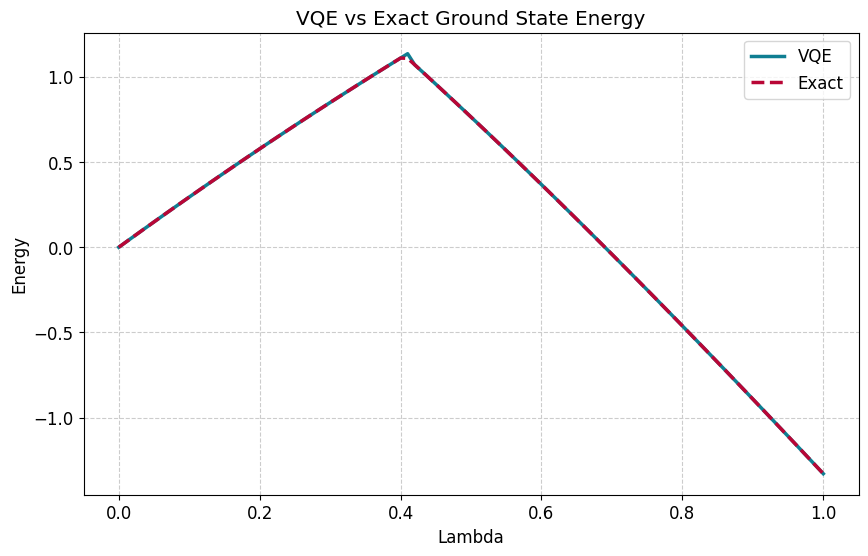

In [259]:
lambdas = np.linspace(0, 1, 101)
vqe_energies, exact_energies, optimal_params = run_vqe(lambdas, method="non_exact")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(lambdas, vqe_energies, label='VQE',linewidth = 2.5)
plt.plot(lambdas, exact_energies,linestyle="--", label='Exact',linewidth = 2.5)
plt.xlabel('Lambda')
plt.ylabel('Energy')
plt.title('VQE vs Exact Ground State Energy')
plt.legend()
plt.grid(True)
plt.show()

### Part f&g) Lipkin model

In [277]:
Z = σ_z()
X = σ_x()
Y = σ_y()
I = np.eye(2)

def tensor_product(matrices):
    """
    Compute the tensor product of a list of 2x2 matrices.
    Args:
        matrices (list): List of 2x2 numpy arrays.
    Returns:
        result (np.array): Tensor product of the matrices.
    """
    result = matrices[0]
    for mat in matrices[1:]:
        result = np.kron(result, mat)
    return result

#### J=1

[[-1. -0. -1. -0.]
 [-0. -0. -0. -0.]
 [-1. -0.  1. -0.]
 [-0. -0. -0. -0.]]


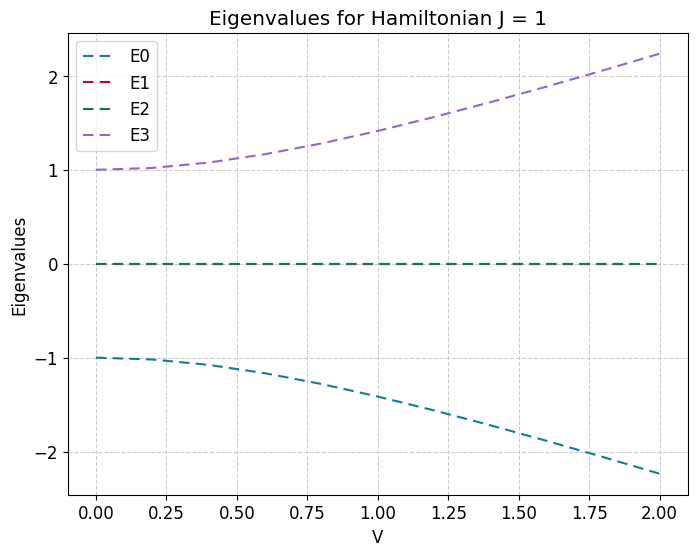

In [291]:
def Hamiltonian_Pauli(eps:float,V:float) -> np.array:
    """
    Returns the Hamiltonian for a given value of lambda
    """
    ZI = np.kron(Z,I)
    ZZ = np.kron(Z,Z)
    XI = np.kron(X,I)
    XZ = np.kron(X,Z)

    
    return -eps/2 * (ZI + ZZ) - V/2 *(XI + XZ) 

epsilon = 1.0
V = np.linspace(0,2,11)
eigenvalues = np.zeros((len(V),4))
print(Hamiltonian_Pauli(epsilon,1))
for i,v in enumerate(V):
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian_Pauli(epsilon,v))
    eigenvalues[i] = eigvals

plt.plot(V, eigenvalues,linestyle = (0,(5,3)))
plt.xlabel("V")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian J = 1")
plt.legend(["E0","E1","E2","E3"])
plt.show()


Processing V = 0.00
  VQE energy: -1.000000, Exact energy: -1.000000
  Error: 0.000000
  Optimal parameters: [1.07379706e-06 1.25571574e-06]
Processing V = 0.20
  VQE energy: -1.019804, Exact energy: -1.019804
  Error: 0.000000
  Optimal parameters: [ 1.97396180e-01 -7.39498633e-07]
Processing V = 0.40
  VQE energy: -1.077033, Exact energy: -1.077033
  Error: 0.000000
  Optimal parameters: [3.80504848e-01 4.12851400e-07]
Processing V = 0.60
  VQE energy: -1.166190, Exact energy: -1.166190
  Error: 0.000000
  Optimal parameters: [5.40420321e-01 9.29295402e-07]
Processing V = 0.80
  VQE energy: -1.280625, Exact energy: -1.280625
  Error: 0.000000
  Optimal parameters: [ 6.74740491e-01 -2.93727981e-07]
Processing V = 1.00
  VQE energy: -1.414214, Exact energy: -1.414214
  Error: 0.000000
  Optimal parameters: [ 7.85397438e-01 -1.70414950e-06]
Processing V = 1.20
  VQE energy: -1.562050, Exact energy: -1.562050
  Error: 0.000000
  Optimal parameters: [ 8.76058515e-01 -1.24171236e-06]
Proce

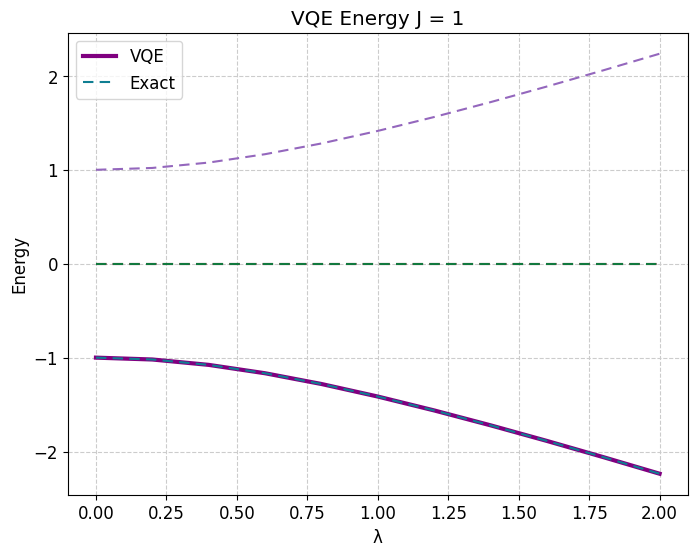

In [ ]:
def pauli_ansatz_j1(params: np.array) -> np.array:
    """
    Returns the state by the ansatz circuit
    Suited for J=1 4x4 Hamiltonian
    """
    np.random.seed(1)
    theta0, theta1 = params
    state = q00
    # Apply rotations and CNOT gates
    state = np.kron(R_y(theta0), np.eye(2)) @ state
    state = CNOT @ state
    state = np.kron(np.eye(2),R_x(theta1)) @ state
    state = CNOT @ state
    return state

def compute_energy_by_terms(params, eps, V, shots=1000):
    """
    Compute energy by measuring each term in the Hamiltonian separately
    """
    state = pauli_ansatz_j1(params)
    
    ZI = np.kron(Z, I)
    ZZ = np.kron(Z, Z)
    XI = np.kron(X, I)
    XZ = np.kron(X, Z)
    
    ZI_exp = quantum_measurement(state, ZI, shots)
    ZZ_exp = quantum_measurement(state, ZZ, shots)
    XI_exp = quantum_measurement(state, XI, shots)
    XZ_exp = quantum_measurement(state, XZ, shots)
    
    energy = -eps/2 * (ZI_exp + ZZ_exp) - V/2 * (XI_exp + XZ_exp)
    
    return energy

def compute_energy_exact(params, eps, V):
    """
    Compute energy expectation value exactly for given parameters and Hamiltonian values
    """
    state = pauli_ansatz_j1(params)
    H = Hamiltonian_Pauli(eps, V)
    energy = np.real(np.dot(np.conj(state), H @ state))
    return energy

def find_ground_state_energy_exact(eps, V):
    """
    Find the ground state energy by direct diagonalization
    """
    H = Hamiltonian_Pauli(eps, V)
    eigvals = np.linalg.eigvalsh(H)
    return eigvals[0]

def cost_function(params, eps, V, method="exact"):
    """
    Cost function for the VQE optimization
    
    Args:
        params: Circuit parameters [theta0, theta1]
        eps: Epsilon parameter for the Hamiltonian
        V: V parameter for the Hamiltonian
        method: "exact" or "measurement" to choose computation method
    
    Returns:
        Energy expectation value
    """
    if method == "exact":
        return compute_energy_exact(params, eps, V)
    else:
        return compute_energy_by_terms(params, eps, V, shots=10000)

def run_vqe(eps, V_range, method="exact"):
    """
    Run the VQE algorithm for different V values
    
    Args:
        eps: Fixed epsilon value
        V_range: Range of V values
        method: "exact" or "measurement" computation method
    
    Returns:
        vqe_energies: List of energies from VQE
        exact_energies: List of exact ground state energies
        optimal_parameters: List of optimal parameters for each V
    """
    vqe_energies = []
    exact_energies = []
    optimal_parameters = []
    all_eigvals = np.zeros((len(V_range), 4))
    
    # Starting parameters
    params = np.array([np.pi/4, np.pi/4])
    
    for i, V in enumerate(V_range):
        print(f"Processing V = {V:.2f}")
        
        # Get all eigenvalues for plotting
        H = Hamiltonian_Pauli(eps, V)
        eigvals, _ = np.linalg.eigh(H)
        all_eigvals[i] = eigvals
        
        result = minimize(cost_function,params,args=(eps, V, method),method='COBYLA',options={'maxiter': 1000, 'rhobeg': 0.1, 'tol': 1e-6})
        
        params = result.x
        optimal_parameters.append(params)
        
        vqe_energy = cost_function(params, eps, V, method)
        vqe_energies.append(vqe_energy)
        exact_energy = find_ground_state_energy_exact(eps, V)
        exact_energies.append(exact_energy)
        
    return np.array(vqe_energies), np.array(exact_energies), optimal_parameters, all_eigvals


epsilon = 1.0
Vvals = np.linspace(0, 2, 11)
vqe_energies, exact_energies, optimal_params, all_eigvals = run_vqe(epsilon, Vvals, method="exact")
    


plt.plot(Vvals, vqe_energies, linewidth=3,color="purple")    
plt.plot(Vvals,eigenvalues,linestyle = (0,(5,3))) 
plt.legend(["VQE","Exact"])
plt.xlabel("λ")
plt.ylabel("Energy")
plt.title("VQE Energy J = 1")
plt.show()

#### J=2

[[-2.          2.44948974  0.          0.        ]
 [ 2.44948974  0.          2.44948974  0.        ]
 [ 0.          2.44948974  2.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[-1  3]
 [ 3  1]]
| -2.00 | 2.45 | 0.00 | 0.00 | 0.00 

| 2.45 | 0.00 | 2.45 | 0.00 | 0.00 

| 0.00 | 2.45 | 2.00 | 0.00 | 0.00 

| 0.00 | 0.00 | 0.00 | -1.00 | 3.00 

| 0.00 | 0.00 | 0.00 | 3.00 | 1.00 



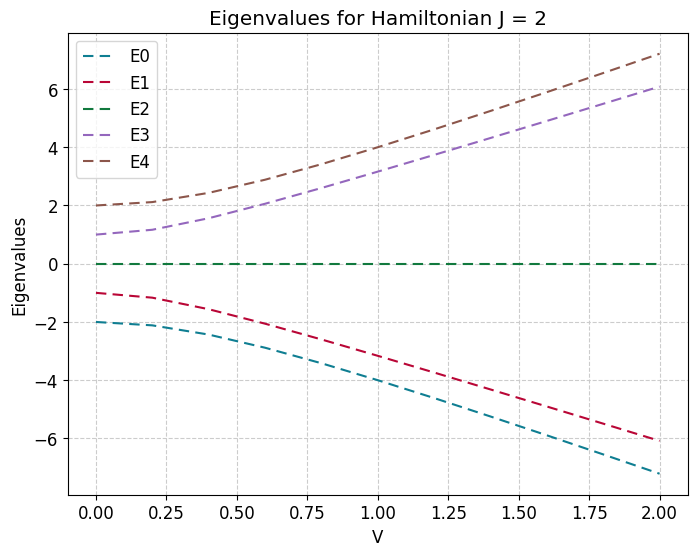

In [292]:
def Block1(eps:float,V:float) -> np.array:
    """ 
    3x3 Matrice with ... 
    """
    ZI = np.kron(Z,I)
    ZZ = np.kron(Z,Z)

    IX = np.kron(I,X)
    ZX = np.kron(Z,X)

    XX = np.kron(X,X)
    YY = np.kron(Y,Y)

    B1 = -eps * (ZI + ZZ) + V/2*np.sqrt(6) * (IX + ZX + XX + YY)
    return B1 

print(np.real(Block1(1,1)))

def Block2(eps:float,V:float) -> np.array:
    B2 = -eps*Z + 3*V*X
    return B2
print(np.real(Block2(1,1)))


def Hamiltonian_PauliJ2 (eps:float,V:float) -> np.array:
    H = np.zeros((5,5),dtype=complex)
    
    H3x3 = Block1(eps,V)
    H2x2 = Block2(eps,V)

    H[:4,:4] = H3x3
    H[3:,3:] = H2x2

    return H

for i in range(len(Hamiltonian_PauliJ2(1,1))):
    for value in Hamiltonian_PauliJ2(1,1)[i]:
        print(f"| {np.real(value):.2f} ",end="")
    print("\n")


epsilon = 1.0
V = np.linspace(0,2,11)
eigenvalues = np.zeros((len(V),5))

for i,v in enumerate(V):
    eigvals, eigvecs = np.linalg.eigh(Hamiltonian_PauliJ2(epsilon,v))
    eigenvalues[i] = eigvals

plt.plot(V, eigenvalues,linestyle = (0,(5,3)))
plt.xlabel("V")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues for Hamiltonian J = 2")
plt.legend(["E0","E1","E2","E3","E4"])
plt.show()

In [ ]:
# VQE

def pauli_ansatz_j2(params: np.array) -> np.array:
    """
    Returns the state by the ansatz circuit
    Suited for J=2 5x5 Hamiltonian
    """
    theta0, theta1, theta2, theta3, theta4, theta5 = params
    
    # Initialize state |000⟩ in 8-dimensional space
    state = np.zeros(8, dtype=complex)
    state[0] = 1.0

    RY123 = tensor_product([R_y(theta0), R_y(theta1), R_y(theta2)])
    state = RY123 @ state
    CNOT12 = np.kron(CNOT, np.eye(2))
    CNOT23 = np.kron(np.eye(2), CNOT)
    state = CNOT12 @ state
    state = CNOT23 @ state
    RY456 = tensor_product([R_y(theta3), R_y(theta4), R_y(theta5)])
    state = RY456 @ state
    return state[:5]

def quantum_measurement(state, operator, shots=1000):
    """
    Simulates quantum measurement for the 5x5 Hamiltonian
    """
    expectation = np.real(np.dot(np.conj(state), np.dot(operator, state)))
    return expectation

def compute_energy_exact(params, eps, V):
    """
    Compute energy expectation value exactly for given parameters and Hamiltonian values
    """
    state = pauli_ansatz_j2(params)
    H = Hamiltonian_PauliJ2(eps, V)
    energy = np.real(np.dot(np.conj(state), H @ state))
    return energy

def cost_function(params, eps, V):
    """
    Cost function for the VQE optimization
    """
    return compute_energy_exact(params, eps, V)

def find_ground_state_energy_exact(eps, V):
    """
    Find the ground state energy by direct diagonalization
    """
    H = Hamiltonian_PauliJ2(eps, V)
    eigvals = np.linalg.eigvalsh(H)
    return eigvals[0]  # Return the lowest eigenvalue

def run_vqe(eps, V_range, num_repeats=3):
    """
    Run the VQE algorithm for different V values
    
    Args:
        eps: Fixed epsilon value
        V_range: Range of V values
        num_repeats: Number of random initializations to try
    
    Returns:
        vqe_energies: List of best energies from VQE
        exact_energies: List of exact ground state energies
        optimal_parameters: List of optimal parameters for each V
    """
    vqe_energies = []
    exact_energies = []
    optimal_parameters = []
    all_eigvals = np.zeros((len(V_range), 5))
    
    for i, V in enumerate(V_range):
        print(f"Processing V = {V:.2f}")
        
        # Get all eigenvalues for plotting
        H = Hamiltonian_PauliJ2(eps, V)
        eigvals, _ = np.linalg.eigh(H)
        all_eigvals[i] = eigvals
        
        # Find exact ground state energy
        exact_energy = find_ground_state_energy_exact(eps, V)
        exact_energies.append(exact_energy)
        
        best_energy = float('inf')
        best_params = None
        for _ in range(num_repeats):
            # Random initial parameters
            initial_params = np.random.rand(6) * 2 * np.pi
            result = minimize(cost_function, initial_params,args=(eps, V),method='COBYLA',options={'maxiter': 2000, 'rhobeg': 0.2, 'tol': 1e-6}
            )

            if result.fun < best_energy:
                best_energy = result.fun
                best_params = result.x
        
        vqe_energies.append(best_energy)
        optimal_parameters.append(best_params)
        
        print(f"  VQE energy: {best_energy:.6f}, Exact energy: {exact_energy:.6f}")
        print(f"  Error: {abs(best_energy - exact_energy):.6f}")
        print(f"  Optimal parameters: {best_params}")
        
    return np.array(vqe_energies), np.array(exact_energies), optimal_parameters, all_eigvals

Processing V = 0.00
  VQE energy: -2.000000, Exact energy: -2.000000
  Error: 0.000000
  Optimal parameters: [1.91773549 1.57079628 1.5707966  4.36545012 4.7123892  4.71238871]
Processing V = 0.20
  VQE energy: -2.116601, Exact energy: -2.116601
  Error: 0.000000
  Optimal parameters: [5.324892   4.71238907 1.58354618 5.32489273 7.9075838  4.24540346]
Processing V = 0.40
  VQE energy: -2.433105, Exact energy: -2.433105
  Error: 0.000000
  Optimal parameters: [0.79082039 4.71239059 1.64253937 0.79082069 1.73410014 3.88583926]
Processing V = 0.60
  VQE energy: -2.884441, Exact energy: -2.884441
  Error: 0.000000
  Optimal parameters: [1.14642733 7.85398142 4.86926417 5.13675807 1.83676436 0.50836047]
Processing V = 0.80
  VQE energy: -3.417601, Exact energy: -3.417601
  Error: 0.000000
  Optimal parameters: [4.5728457  7.85398174 1.33066017 1.71033977 5.0576902  9.78510845]
Processing V = 1.00
  VQE energy: -4.000000, Exact energy: -4.000000
  Error: 0.000000
  Optimal parameters: [1.473

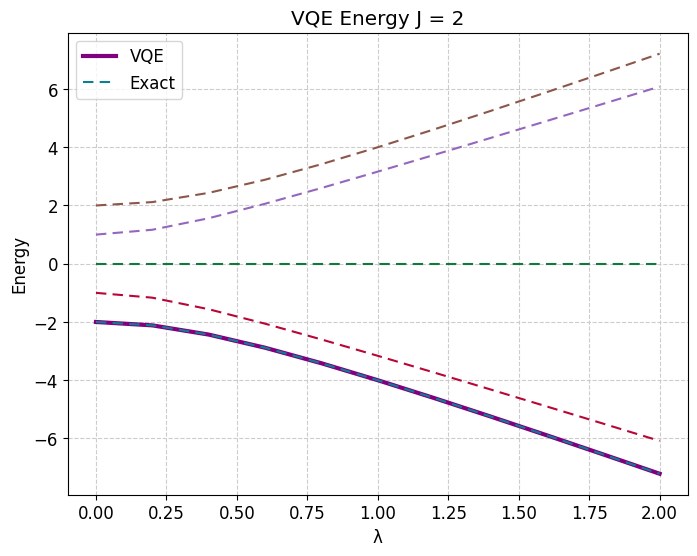

In [283]:
epsilon = 1.0
Vvals = np.linspace(0, 2, 11)
    
vqe_energies, exact_energies, optimal_params, all_eigvals = run_vqe(epsilon, Vvals, num_repeats=5)

plt.plot(Vvals, vqe_energies, linewidth=3,color="purple")    
plt.plot(Vvals,eigenvalues,linestyle = (0,(5,3))) 
plt.legend(["VQE","Exact"])
plt.xlabel("λ")
plt.ylabel("Energy")
plt.title("VQE Energy J = 2")
plt.show()
    